# 1 - Importação de bibliotecas e funções

## Bibliotecas

In [925]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings

## Funções

## Configurações

In [926]:
warnings.filterwarnings("ignore")

# 2 - Importação dos dados

In [828]:
df_raw = pd.read_csv("C:\\Users\\victo\\repos\\comunidade_ds\\data_science_clusterizacao\\data\\raw\\raw.csv", encoding = 'unicode_escape')

# 3 - Descrição dos dados

In [829]:
df1 = df_raw.copy()

## Visualização

In [830]:
df1.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,29-Nov-16,7.65,17850.0,United Kingdom,NaN
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,29-Nov-16,4.25,17850.0,United Kingdom,NaN
7,536366,22633,HAND WARMER UNION JACK,6,29-Nov-16,1.85,17850.0,United Kingdom,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,29-Nov-16,1.85,17850.0,United Kingdom,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,29-Nov-16,1.69,13047.0,United Kingdom,NaN


In [831]:
df1.tail(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541884,581585,84946,ANTIQUE SILVER T-LIGHT GLASS,12,7-Dec-17,1.25,15804.0,United Kingdom,NaN
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,7-Dec-17,0.85,15804.0,United Kingdom,NaN
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,7-Dec-17,0.39,15804.0,United Kingdom,NaN
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,7-Dec-17,3.75,15804.0,United Kingdom,NaN
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,7-Dec-17,0.95,15804.0,United Kingdom,NaN
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,7-Dec-17,1.95,15804.0,United Kingdom,NaN
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,7-Dec-17,2.95,13113.0,United Kingdom,NaN
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,7-Dec-17,1.25,13113.0,United Kingdom,NaN
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,7-Dec-17,8.95,13113.0,United Kingdom,NaN
541893,581586,20685,DOORMAT RED RETROSPOT,10,7-Dec-17,7.08,13113.0,United Kingdom,NaN


## Dimensões

In [832]:
df1.shape

(541909, 9)

## Colunas

In [833]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

## Tipos

In [834]:
df1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

## NAs

In [835]:
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

## Duplicados

In [836]:
df1.duplicated(subset=['Unnamed: 8']).sum()

541908

## Estatísticas

### Variáveis numéricas

In [837]:
variaveis_numericas = ['int64', 'float64']

#### Medidas de tendência e dispersão

In [838]:
df1.select_dtypes(variaveis_numericas).describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Medidas de distribuição

In [839]:
df1.select_dtypes(variaveis_numericas).skew()

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
Unnamed: 8           NaN
dtype: float64

In [840]:
df1.select_dtypes(variaveis_numericas).kurtosis()

Quantity      119769.160031
UnitPrice      59005.719097
CustomerID        -1.179982
Unnamed: 8              NaN
dtype: float64

### Variáveis categóricas

In [841]:
variaveis_categoricas = ['object']

#### Medidas de frequência

In [842]:
df1.select_dtypes(variaveis_categoricas).describe().T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,305,3-Dec-17,5331
Country,541909,38,United Kingdom,495478


# 4 - Tratamento dos dados

In [843]:
df2 = df1.copy()

## Renomeação

In [844]:
new_columns_name = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country', 'unnamed_8']

df2.columns = new_columns_name

## Exclusão

### Colunas

In [845]:
# Exclusão da coluna "unnamed_8" sem informação

df2 = df2.drop(['unnamed_8'], axis=1)

### Linhas

In [846]:
# Exclusão das linhas com "customer_id" sem informação

df2 = df2.dropna(subset=['customer_id'])


# Exclusão das linhas com "quantity" negativo

df2 = df2.loc[df2["quantity"] > 0 ]


# Exclusão das linhas com "unit_price" negativo

df2 = df2.loc[df2["unit_price"] > 0 ]

## Transformação

### Tipo de dado

In [847]:
# Transformação da coluna "invoice_date" de objeto para data

df2['invoice_date'] = pd.to_datetime(df2['invoice_date'])


# Transformação da coluna "customer_id" de float para objeto

df2['customer_id'] = df2['customer_id'].astype(int)
df2['customer_id'] = df2['customer_id'].astype(str)

# 6 - Engenharia de features

In [890]:
df3 = df2.copy()

## Derivação

In [891]:
# Criação da coluna "total_amount"

df3['total_amount'] = df3['quantity'] * df3['unit_price']


# Criação da coluna "recency"

dia = pd.to_datetime("2017-12-08")

recency = df3.groupby(["customer_id"]).agg({"invoice_date":lambda x:((dia-x.max()).days)})


# Criação da coluna "frequency"

frequency = df3.drop_duplicates(subset="invoice_no").groupby(["customer_id"])[["invoice_no"]].count()


# Criação da coluna "monetary"

monetary = df3.groupby(["customer_id"])[["total_amount"]].sum()


# Criação do dataframe RFM

rfm = pd.concat([recency,frequency,monetary], axis=1).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

## Criação

# 7 - Análise exploratória dos dados

In [850]:
df4 = df3.copy()

## Medidas e gráficos de tendência e dispersão

In [851]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.000,2.000,5.00,209.00
monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


<Axes: >

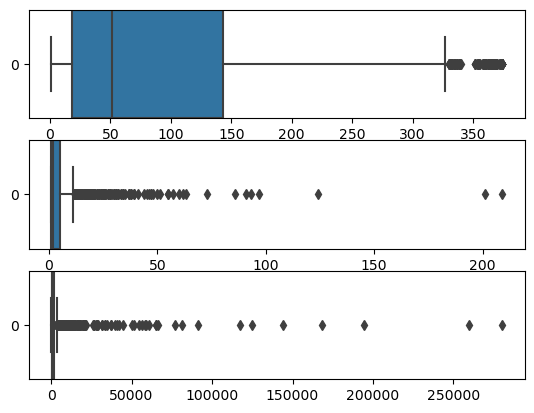

In [852]:
plt.subplot( 3, 1, 1 )
sns.boxplot(data=rfm["recency"], orient="h", width=1)

plt.subplot( 3, 1, 2 )
sns.boxplot(data=rfm["frequency"], orient="h", width=1)

plt.subplot( 3, 1, 3 )
sns.boxplot(data=rfm["monetary"], orient="h", width=1)

## Medidas e gráficos de distribuição

array([[<Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'frequency'}>],
       [<Axes: title={'center': 'monetary'}>, <Axes: >]], dtype=object)

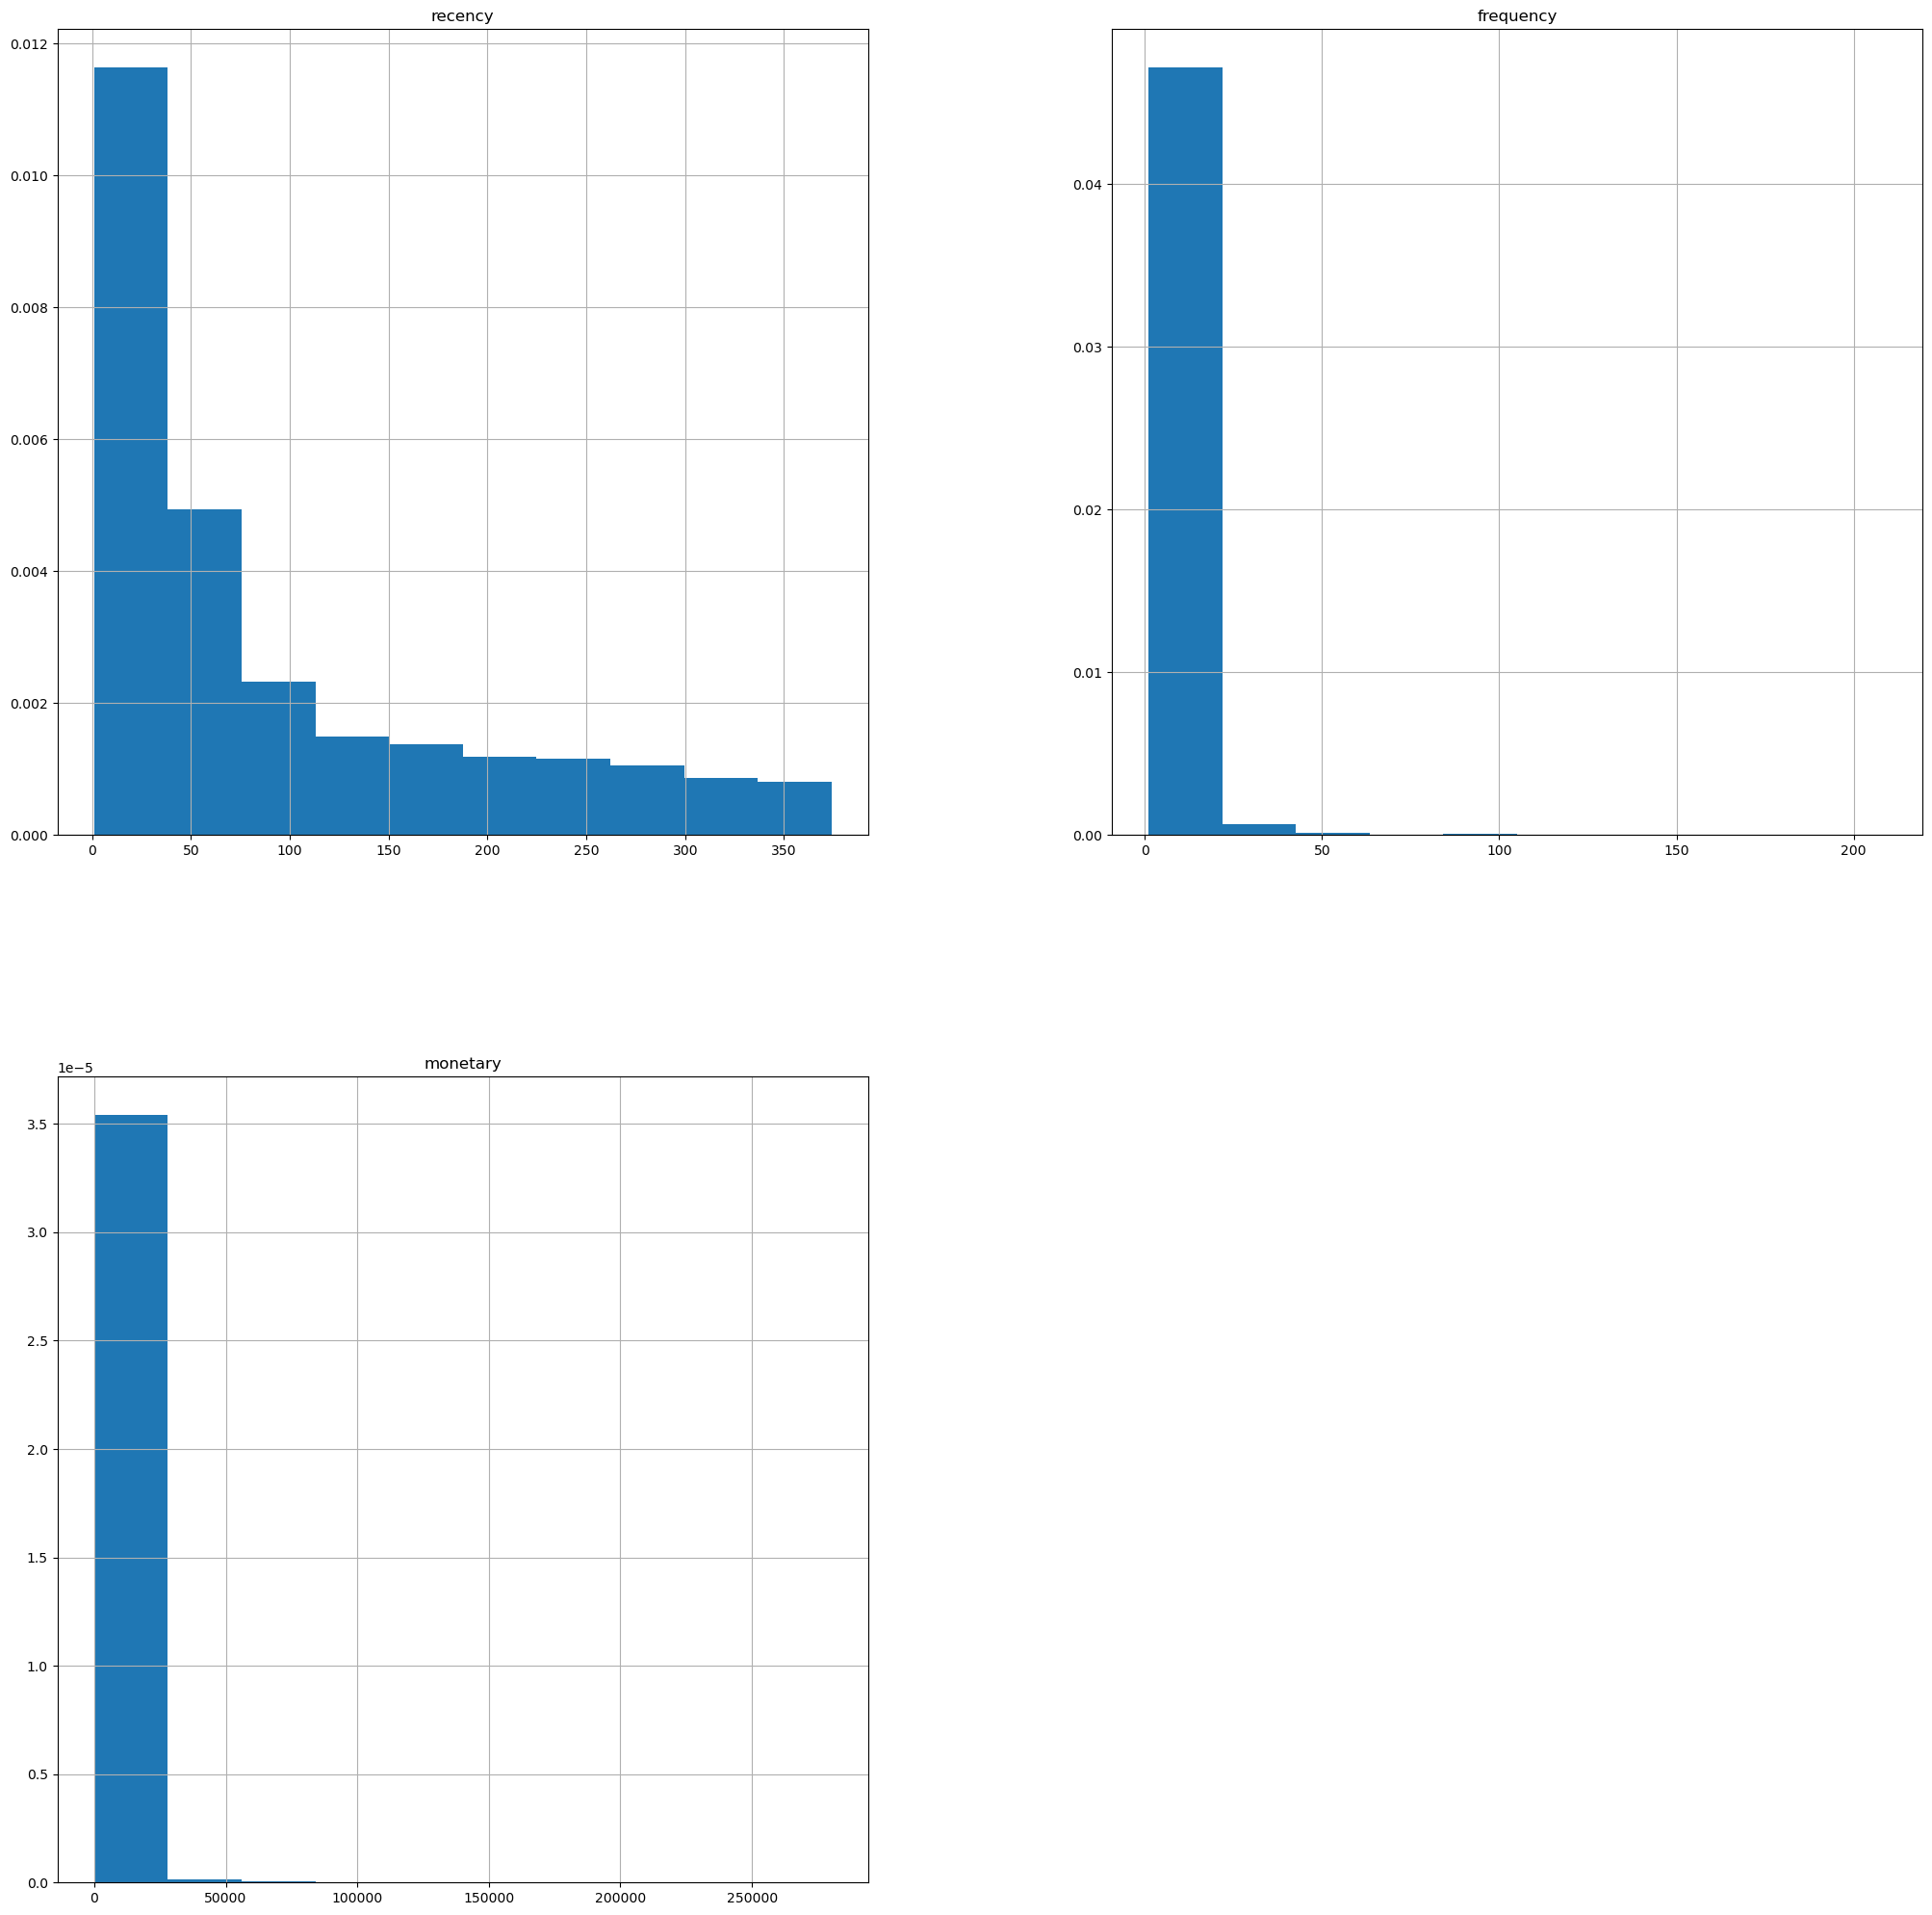

In [853]:
rfm.hist(figsize=[25,25], density=True)

In [854]:
rfm.skew()

customer_id     0.000999
recency         1.245826
frequency      12.067031
monetary       19.324953
dtype: float64

In [855]:
rfm.kurtosis()

customer_id     -1.195338
recency          0.430432
frequency      249.058123
monetary       478.048121
dtype: float64

# 8 - Preparação dos dados

In [856]:
rfm1 = rfm.copy()

## Reescala

In [858]:
ss = StandardScaler ()

In [859]:
#Reescala da variável "recency" com o método standardscaler

rfm1["recency"] = ss.fit_transform(rfm1[["recency"]])


#Reescala da variável "frequency" com o método standardscaler

rfm1["frequency"] = ss.fit_transform(rfm1[["frequency"]])


#Reescala da variável "monetary" com o método standardscaler

rfm1["monetary"] = ss.fit_transform(rfm1[["monetary"]])

## Filtragem

In [860]:
rfm1 = rfm1.drop(columns='customer_id')

# 10 - Treinamento de modelos

In [895]:
rfm2 = rfm1.copy()

## KMeans

### Treinamento

In [896]:
sum_of_sq_dist = {}

for k in range(1,15):
    km = KMeans(n_clusters=k, init= 'k-means++', max_iter= 1000, n_init=10)
    km = km.fit(rfm2)
    sum_of_sq_dist[k] = km.inertia_

### Otimização

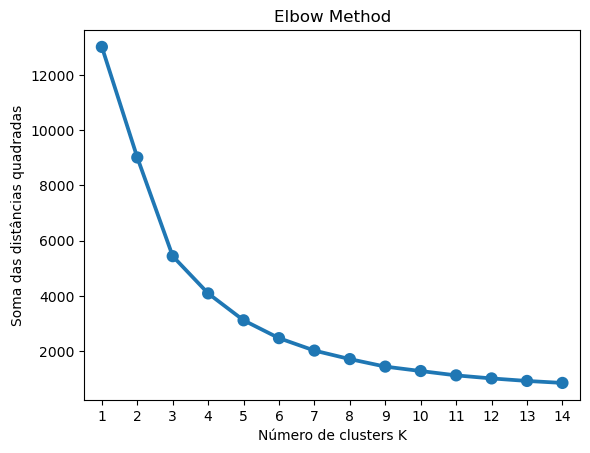

In [897]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))

plt.xlabel('Número de clusters K')
plt.ylabel('Soma das distâncias quadradas')
plt.title('Elbow Method')

plt.show()

In [898]:
km = KMeans(n_clusters=4, init= 'k-means++', max_iter= 1000, n_init=10)
km.fit(rfm2)

KMeans(max_iter=1000, n_clusters=4, n_init=10)

### Análise

In [930]:
# Criação do dataframe final com os dados de id de cliente, recência, frequência, monetário e custler

rfm_final = rfm.copy()


# Inclusão da label do cluster a cada id

rfm_final["cluster"] = (km.labels_ + 1)


# Inclusão do plano de fidelidade de cada cliente de acordo com o cluster

def func(row):
    if row["cluster"]==4:
        return 'Diamante'
    elif row["cluster"]==3:
        return 'Ouro'
    elif row["cluster"]==2:
        return 'Prata'
    else:
        return 'Bronze'
    
rfm_final['fidelidade'] = rfm_final.apply(func, axis=1)

In [931]:
rfm_final.groupby("cluster")["recency","frequency","monetary"].mean().reset_index()

,cluster,recency,frequency,monetary
0,1,249.173421,1.551367,478.194732
1,2,44.486734,3.655748,1349.824613
2,3,16.123223,22.047393,12453.225924
3,4,7.615385,82.538462,127338.313846


In [932]:
rfm_final.groupby("fidelidade")["recency","frequency","monetary"].mean().sort_values('monetary',ascending=False).reset_index()

,fidelidade,recency,frequency,monetary
0,Diamante,7.615385,82.538462,127338.313846
1,Ouro,16.123223,22.047393,12453.225924
2,Prata,44.486734,3.655748,1349.824613
3,Bronze,249.173421,1.551367,478.194732


In [933]:
rfm_final.fidelidade.value_counts()

Prata       3053
Bronze      1061
Ouro         211
Diamante      13
Name: fidelidade, dtype: int64

In [976]:
rfm_final.loc[rfm_final['fidelidade'] == "Diamante", :].sample(10)

,customer_id,recency,frequency,monetary,cluster,fidelidade
3771,17511,3,31,91062.38,4,Diamante
3728,17450,9,46,194550.79,4,Diamante
2176,15311,1,91,60767.90,4,Diamante
562,13089,3,97,58825.83,4,Diamante
2702,16029,39,63,81024.84,4,Diamante
1879,14911,2,201,143825.06,4,Diamante
1689,14646,2,73,280206.02,4,Diamante
326,12748,1,209,33719.73,4,Diamante
4010,17841,2,124,40991.57,4,Diamante
55,12415,25,21,124914.53,4,Diamante


In [997]:
rfm_final.loc[(rfm_final['fidelidade'] == "Diamante") & (rfm_final['customer_id'] == "17511"), :]

,customer_id,recency,frequency,monetary,cluster,fidelidade
3771,17511,3,31,91062.38,4,Diamante


### Performance

In [998]:
label = km.predict(rfm2)
silhouette_score(rfm2, label)

0.6160085417757372

# 13 - Análise de performance do modelo final

## Retorno de Investimento

# 14 - Implantação do modelo em produção

## Serialização

### Modelo

In [ ]:
pickle.dump( xgb_otimizado, open( "C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\models\\xgb_model.pkl", 'wb' ) )

### Features

#### Codificadores

In [1156]:
#Codificação da variável "gender" com o método mean encoding

pickle.dump( gender_mean_encoding, open( '../src/features/gender_encoding.pkl', 'wb' ) )


#Codificação da variável "vehicle_damage" com o método mean encoding

pickle.dump( vehicle_damage_mean_encoding, open( '../src/features/vehicle_damage_encoding.pkl', 'wb' ) )


#Codificação da variável "vehicle_age" com o método ordinal encoding

pickle.dump( oe, open( '../src/features/vehicle_age_encoding.pkl', 'wb' ) )


#Codificação da variável "region_code" com o método mean encoding

pickle.dump( region_code_mean_encoding, open( '../src/features/region_code_encoding.pkl', 'wb' ) )


#Codificação da variável "policy_sales_channel" com o método mean encoding

pickle.dump( policy_sales_channel_mean_encoding, open( '../src/features/policy_sales_channel_encoding.pkl', 'wb' ) )

#### Reescaladores

In [980]:
#Reescala da variável "age" com o método minmaxscaler

pickle.dump( mms_age, open( '../src/features/age_scaler.pkl', 'wb' ) )


#Reescala da variável "annual_premium" com o método minmaxscaler

pickle.dump(mms_annual_premium, open( '../src/features/annual_premium_scaler.pkl', 'wb' ) )


#Reescala da variável "vintage" com o método minmaxscaler

pickle.dump(mms_vintage, open( '../src/features/vintage_scaler.pkl', 'wb' ) )

## Criação da classe do modelo

In [1047]:
import pickle
import numpy  as np
import pandas as pd


class HealthInsurance:
    
    def __init__( self ):
        self.home_path = 'C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\'
        self.gender_encoding = pickle.load( open( self.home_path + 'src\\features\\gender_encoding.pkl', 'rb' ) )
        self.vehicle_damage_encoding = pickle.load( open( self.home_path + 'src\\features\\vehicle_damage_encoding.pkl', 'rb' ) ) 
        self.vehicle_age_encoding = pickle.load( open( self.home_path + 'src\\features\\vehicle_age_encoding.pkl', 'rb' ) )
        self.region_code_encoding = pickle.load( open( self.home_path + 'src\\features\\region_code_encoding.pkl', 'rb' ) )
        self.policy_sales_channel_encoding = pickle.load( open( self.home_path + 'src\\features\\policy_sales_channel_encoding.pkl', 'rb' ) )
        self.age_scaler = pickle.load( open( self.home_path + 'src\\features\\age_scaler.pkl', 'rb' ) )
        self.annual_premium_scaler = pickle.load( open( self.home_path + 'src\\features\\annual_premium_scaler.pkl', 'rb' ) )
        self.vintage_scaler = pickle.load( open( self.home_path + 'src\\features\\vintage_scaler.pkl', 'rb' ) )
        
        
    def data_cleaning (self, df2):
        
        # Renomeação de colunas
        
        new_columns_name = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']

        df2.columns = new_columns_name
        
        
        return df2
    
    
    
    def data_preparation (self, df_train):
        
        # Codificações
        
        df_train['gender'] =  df_train['gender'].map(self.gender_encoding)
        
        df_train['vehicle_damage'] =  df_train['vehicle_damage'].map(self.vehicle_damage_encoding)

        df_train["vehicle_age"] = self.vehicle_age_encoding.transform(df_train[["vehicle_age"]])
        
        df_train['region_code'] =  df_train['region_code'].map(self.region_code_encoding)
        
        df_train['policy_sales_channel'] =  df_train['policy_sales_channel'].map(self.policy_sales_channel_encoding)
        
        
        # Reescalas
        
        df_train["age"] = self.age_scaler.transform(df_train[["age"]])
        
        df_train["annual_premium"] = self.annual_premium_scaler.transform(df_train[["annual_premium"]])
        
        df_train["vintage"] = self.vintage_scaler.transform(df_train[["vintage"]])
        
        
        # Seleção de features

        features_selected = ['previously_insured', 'vehicle_damage', 'vehicle_age', 'age', 'annual_premium', 'vintage', 'policy_sales_channel']
        
        
        return df_train[features_selected]
        
        

    def get_prediction (self, model, original_data, test_data):
        
        # Predição do modelo
        
        pred = model.predict_proba(test_data)[:,1]
        
        
        # Junção da predição aos dados originais
        
        original_data['score'] = pred
        
        
        return original_data.to_json( orient='records', date_format='iso' )

## Desenvolvimento da API

In [1071]:
import pickle
import pandas as pd
from flask import Flask, request, Response
from models.HealthInsurance import HealthInsurance


# Carregamento do modelo

path = 'C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\'
model = pickle.load( open( path + 'models\\xgb_model.pkl', 'rb' ) )


# Inicialização da API

app = Flask( __name__ )

@app.route( '/predict', methods=['POST'] )

def health_insurance_predict():
    
    test_json = request.get_json()
    
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instanciamento da classe
        pipeline = HealthInsurance()
        
        # Limpeza dos dados
        df1 = pipeline.data_cleaning(test_raw)
        
        # Preparação dos dados
        df2 = pipeline.data_preparation(df1)
        
        # Predição do modelo
        df_response = pipeline.get_prediction( model, test_raw, df2 )
        
        return df_response
    
    else:
        return Response( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run( '0.0.0.0', debug=True )

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.15:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

## Teste

### Modelo em produção na nuvem

In [109]:
# Criação dos dados

df_test = pd.read_csv ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\data\\raw\\test.csv")

df_test = df_test.sample(15)


# Conversão dos dados em JSON

data = json.dumps( df_test.to_dict( orient='records' ) )


# Requisição da API

# url = 'http://127.0.0.1:5000/predict'
url = 'https://health-insurance-cross-sell-dvkh.onrender.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )


# Recebimento dos dados e ordenação pelo score

d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )
d1.sort_values( 'score', ascending=False ).head(15)

Status Code 502


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Requisição pelo google sheets

In [56]:
df_test = pd.read_csv ("C:\\Users\\victo\\repos\\comunidade_ds\\pa_health_insurance_cross_sell\\data\\raw\\test.csv")
df_test = df_test.sample(50, random_state=42)
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
110614,491724,Female,36,1,29.0,0,1-2 Year,Yes,2630.0,156.0,56
87053,468163,Female,43,1,21.0,0,1-2 Year,Yes,32003.0,124.0,162
38340,419450,Male,22,1,28.0,1,< 1 Year,No,31631.0,160.0,128
3200,384310,Male,25,1,50.0,1,< 1 Year,No,31831.0,152.0,262
3896,385006,Male,33,1,41.0,1,< 1 Year,No,38284.0,152.0,256
98769,479879,Female,22,1,8.0,0,1-2 Year,Yes,61626.0,124.0,120
13846,394956,Female,28,1,30.0,1,< 1 Year,No,25345.0,152.0,244
60311,441421,Male,52,1,20.0,0,> 2 Years,Yes,2630.0,26.0,264
963,382073,Male,25,1,11.0,1,< 1 Year,No,32819.0,152.0,298
95290,476400,Male,60,1,8.0,1,1-2 Year,Yes,2630.0,26.0,164


In [ ]:
data = json.dumps( df_test.to_dict( orient='records' ) )

url = 'https://health-insurance-cross-sell-dvkh.onrender.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )

d1